In [1]:
from impresso import connect, AND, OR

impresso = connect()

🎉 You are now connected to the Impresso API!  🎉
🔗 Using API: https://dev.impresso-project.ch/public-api


# Text reuse clusters

## Find clusters mentioning text

In [2]:
impresso.text_reuse.clusters.find(
    text="banana",
    offset=2,
    limit=5,
    order_by="passages-count",
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c137438978332,Un rapport géné-\nral au roi Léopold sur la si...,59.183673,2,1891-07-20,1891-07-21
tr-nobp-all-v01-c60129939020,"Wie Kinder der Mission ihm erzählt haben, gibt...",51.000000,2,1896-02-06,1896-02-21
tr-nobp-all-v01-c42949726081,"renversé\nLÉOPOLDVILLE, 9 mars A la veille de ...",55.405405,2,1961-03-10,1961-03-10


## Cluster size

In [3]:
impresso.text_reuse.clusters.find(
    text="banana",
    cluster_size=(50, 100),
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c200886,PRIX CRAQUANTS\nPROFITEZ-EN MAINTENANT ! OFFRE...,1.010101,63,2007-05-15,2011-12-29
tr-nobp-all-v01-c117172,"La Chaux-de-Fonds,\nLe Sphynx samedi 22 mars 2...",38.571429,50,2008-01-14,2008-12-22


## Mentioning text in title

In [4]:
impresso.text_reuse.clusters.find(
    title=AND("luxembourg", "suisse"),
    cluster_size=(100, 200),
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c433978,Trafic-marchandises Luxembourg — Suisse.\nAvec...,0.581395,139,1931-02-16,1958-01-17
tr-nobp-all-v01-c325226,JOURNAL de GENEVE\net GAZETTE de LAUSANNE\nEdi...,36.000000,143,1991-12-13,1993-11-30


## Lexical overlap

In [5]:
impresso.text_reuse.clusters.find(
    text="banana",
    lexical_overlap=(50, 51),
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c154619006960,Fusillade entre soldats de\nl’ONU et soldats c...,50.980392,4,1961-03-04,1961-03-04
tr-nobp-all-v01-c60129939020,"Wie Kinder der Mission ihm erzählt haben, gibt...",51.000000,2,1896-02-06,1896-02-21
tr-nobp-all-v01-c240518594491,Encore avantageux plus\nValable du 28.8 au 3.9...,50.000000,2,2007-08-28,2008-09-02


## Day delta

Number of days between the first and last mention of the text in the cluster.

In [6]:
impresso.text_reuse.clusters.find(
    text="banana",
    day_delta=(50, 100),
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c34359907704,Les Sociétés anonymes suisses\npendant la cris...,78.536585,2,1937-05-08,1937-07-10


## Date range

In [7]:
from impresso import DateRange

impresso.text_reuse.clusters.find(
    text="banana", 
    date_range=DateRange("1921-05-21", "2001-01-02")
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c171798985973,veut récupérer\nMatadi et Banana\nLéopoldville...,66.956522,2,1961-03-07,1961-03-07
tr-nobp-all-v01-c214748626011,Le président\ndu Zimbabwe\nun pasteur\nSalisbu...,89.221557,2,1980-04-12,1980-04-12
tr-nobp-all-v01-c85899364059,Le premier satellite americain serait lire\nde...,43.137255,3,1955-08-16,1955-08-19


## Newspaper

In [8]:
impresso.text_reuse.clusters.find(
    text="banana", 
    newspaper_id=OR("EXP", "GDL"),
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c51539934627,"Banana, Feindouno et\nFeltscher à Lausanne\nFO...",100.000,2,2013-08-31,2013-08-31
tr-nobp-all-v01-c117193,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,100.000,2,2008-07-10,2008-07-10
tr-nobp-all-v01-c299325,"Colonies de vacances », « Juanita\nBanana », «...",34.375,2,1967-06-22,1967-10-02


## Collection

In [9]:
impresso.text_reuse.clusters.find(collection_id="12312312")

""


## Front page

In [10]:
impresso.text_reuse.clusters.find(
    text="banana", 
    front_page=True,
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c231928631691,"La « Panther » coulée\nMilan , 28 teptembre .\...",60.606061,2,1914-09-29,1914-09-29
tr-nobp-all-v01-c68719627685,congolaise\nLEOPOLDVILLE (AFP et VPI). — « D'a...,53.658537,3,1961-03-21,1961-03-21
tr-nobp-all-v01-c94489677052,"se plaint\nà Bruxelles\n» ""Z, 'îi’ÜL 'HT *\nNe...",64.800000,3,1960-09-09,1960-09-09


## Topic

In [12]:
impresso.text_reuse.clusters.find(
    text="banana", 
    topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr")
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c117193,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,100.000000,2,2008-07-10,2008-07-10
tr-nobp-all-v01-c17180190458,1. Faisaient la tournée des cours. 2. Province...,53.846154,5,2005-03-30,2008-07-07
tr-nobp-all-v01-c17180190457,1. Faisaient la tournée des cours. 2. Province...,78.813559,3,2008-07-07,2008-07-07


## Language

In [13]:
impresso.text_reuse.clusters.find(
    text="luxembourg", 
    language=OR("it", "en")
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c8590352366,"INTERNATIONAL\nPORTFOLIO SICAV\n1, rue Schille...",18.840580,30,1975-07-11,1997-03-26
tr-nobp-all-v01-c322228,"Amsterdam, Atlanta, Barcelona, Brussels, Chica...",76.923077,2,1989-12-02,1990-04-13
tr-nobp-all-v01-c223338773787,"Business men, students of affairs,\nmen of let...",59.677419,2,1947-03-13,1947-03-13


## Country

In [14]:
impresso.text_reuse.clusters.find(
    text="schengen", 
    country=OR("FR", "CH")
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c249108133968,En route vers\nSchengen\nSUISSE _.\nEn dépit d...,97.297297,2,2001-03-27,2001-03-27
tr-nobp-all-v01-c111669500795,Comité d'action contre l'adhésion à Schengen /...,70.833333,3,2005-06-02,2005-06-03
tr-nobp-all-v01-c25770065012,Schengen L'Autriche\nmembre à part entière\nL'...,100.000000,2,1998-04-02,1998-04-02


## Entity mention

In [15]:
impresso.text_reuse.clusters.find(
    text="schengen", 
    mention=OR("Belval", "Lausanne")
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c60129931875,Die Verwaltung der öf-\nfentlichen Gebäude hat...,46.153846,2,1946-07-31,1946-09-20
tr-nobp-all-v01-c42949763205,Europe : collaborations indivisibles\nEDITORIA...,100.000000,2,1993-05-14,1993-05-14
tr-nobp-all-v01-c68719674988,CONSEIL FEDERAL Lutte contre la criminalité\nF...,86.206897,2,1995-06-28,1995-06-28


## Entity by ID

In [17]:
impresso.text_reuse.clusters.find(
    text="banana",
    entity_id="aida-0001-54-Switzerland"
)

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c128849280553,"Schreckliche Seefahrt . Antwerpen ,\n(>; v . O...",71.527778,2,1892-02-19,1892-02-20
tr-nobp-all-v01-c68719627685,congolaise\nLEOPOLDVILLE (AFP et VPI). — « D'a...,53.658537,3,1961-03-21,1961-03-21
tr-nobp-all-v01-c111669354290,Afin de financer un projet de télévision pirat...,60.937500,3,1987-08-14,1987-08-15


# Text reuse clusters facets

## Date range

,count
val,
1700-01-01T00:00:00Z,0
1701-01-01T00:00:00Z,0
1702-01-01T00:00:00Z,0

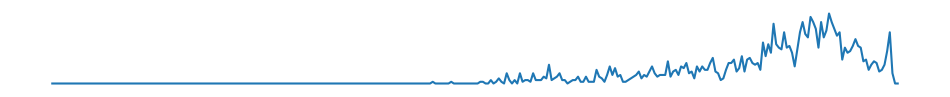

In [19]:
impresso.text_reuse.clusters.facet("daterange", lexical_overlap=(1, 2))

## Cluster size

,count
val,
0,1687
10000,0
20000,0

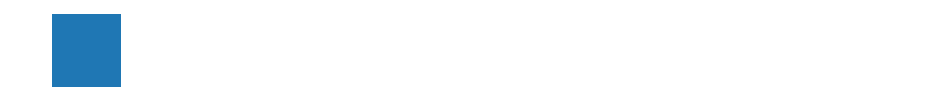

In [21]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterSize",
    lexical_overlap=(1, 2)
)

## Lexical overlap

,count
val,
0,1687
10,0
20,0

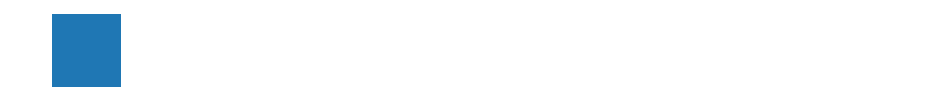

In [23]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterLexicalOverlap",
    lexical_overlap=(1, 2)
)

## Day delta

,count
val,
0,219
10,28
20,5

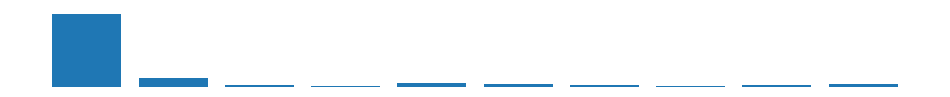

In [25]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterDayDelta",
    lexical_overlap=(1, 2)
)

## Newspaper

,count,uid,item.uid,item.acronym,item.labels,item.languages,item.included,item.name,item.endYear,item.startYear,item.countArticles,item.countIssues,item.countPages,item.deltaYear,item.properties,item.fetched
val,,,,,,,,,,,,,,,,
EXP,1112,EXP,EXP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP,1071,IMP,IMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLE,1018,LLE,LLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

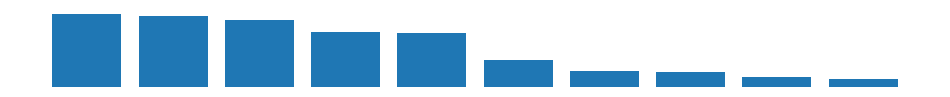

In [27]:
impresso.text_reuse.clusters.facet(
    "newspaper",
    lexical_overlap=(1, 2)
)

# Text reuse passages

## Find passages mentioning text

In [29]:
impresso.text_reuse.passages.find(
    text="belval",
    offset=2,
    limit=5,
    order_by="clusterSize",
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c103079291010-IMP-2008-04-28-a-i0300@0:2689,0,2689,Tu n’aurais pas dû partir\nJean-Louis Grosmair...,Tu n’aurais pas dû partir,[35],[],[{'id': 'tr-nobp-all-v01-c103079291010'}],False,2689,2008-04-28T00:00:00+00:00,"[57,1275,1366,489]",IMP-2008-04-28-a-i0300,tr-nobp-all-v01-c103079291010,2,0,100.000000,IMP,IMP-2008-04-28-a
c103079305149-tageblatt-1941-02-10-a-i0068@0:3569,0,3569,Gerichtszeitung\nAm 10. Mai gegen 9 Uhr morgen...,Gerichtszeitung,[10],[local-duma-mxB6kMKc],"[{'id': 'tr-nobp-all-v01-c103079305149'}, {'id...",False,3569,1941-02-10T00:00:00+00:00,"[100,1200,1810,1527]",tageblatt-1941-02-10-a-i0068,tr-nobp-all-v01-c103079305149,2,0,68.181818,tageblatt,tageblatt-1941-02-10-a
c103079397256-luxwort-1941-04-12-a-i0078@0:803,0,803,Oeffentliche Verdinggabe\nAuf die Lieferung vo...,Oeffentliche Verdinggabe,[5],[local-duma-mxB6kMKc],[{'id': 'tr-nobp-all-v01-c103079397256'}],False,803,1941-04-12T00:00:00+00:00,"[3634,1462,852,873]",luxwort-1941-04-12-a-i0078,tr-nobp-all-v01-c103079397256,2,3,62.337662,luxwort,luxwort-1941-04-12-a


## Cluster size

In [31]:
impresso.text_reuse.passages.find(
    text="banana",
    cluster_size=(50, 100),
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c200886-EXP-2009-07-29-a-i0041@0:522,0,522,PRIX CRAQUANTS\nPROFITEZ-EN MAINTENANT ! OFFRE...,NaN,[4],[],"[{'id': 'tr-nobp-all-v01-c163801'}, {'id': 'tr...",False,522,2009-07-29T00:00:00+00:00,"[91,130,1487,1655]",EXP-2009-07-29-a-i0041,tr-nobp-all-v01-c200886,63,1689,1.010101,EXP,EXP-2009-07-29-a
c117172-IMP-2008-03-25-a-i0111@0:642,0,642,"La Chaux-de-Fonds,\nLe Sphynx samedi 22 mars 2...",NaN,[12],[],[{'id': 'tr-nobp-all-v01-c117172'}],False,642,2008-03-25T00:00:00+00:00,"[148,315,1530,2220]",IMP-2008-03-25-a-i0111,tr-nobp-all-v01-c117172,50,343,38.571429,IMP,IMP-2008-03-25-a
c117172-EXP-2008-03-25-a-i0105@0:642,0,642,"La Chaux-de-Fonds,\nLe Sphynx samedi 22 mars 2...",,[12],[],[{'id': 'tr-nobp-all-v01-c117172'}],False,642,2008-03-25T00:00:00+00:00,"[148,315,1530,2220]",EXP-2008-03-25-a-i0105,tr-nobp-all-v01-c117172,50,343,38.571429,EXP,EXP-2008-03-25-a


## Mentioning text in title

In [33]:
impresso.text_reuse.passages.find(
    title=AND("luxembourg", "suisse"),
    cluster_size=(100, 200),
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c433978-obermosel-1946-08-14-a-i0035@0:474,0,474,CHEMINS DE FER LUXEMBOURGEOIS. — Avis.\nTarif ...,CHEMINS DE FER LUXEMBOURGEOIS. — Avis. Tarif i...,[7],[],[{'id': 'tr-nobp-all-v01-c433978'}],False,474,1946-08-14T00:00:00+00:00,"[2640,3768,840,392]",obermosel-1946-08-14-a-i0035,tr-nobp-all-v01-c433978,139,9832,0.581395,obermosel,obermosel-1946-08-14-a
c433978-luxwort-1946-02-28-a-i0031@0:495,0,495,AVIS — Tarif international voyageurs\net bagag...,AVIS — Tarif international voyageurs et bagage...,[3],[],[{'id': 'tr-nobp-all-v01-c433978'}],False,495,1946-02-28T00:00:00+00:00,"[3044,4564,700,293]",luxwort-1946-02-28-a-i0031,tr-nobp-all-v01-c433978,139,9832,0.581395,luxwort,luxwort-1946-02-28-a
c433978-obermosel-1946-03-13-a-i0042@0:557,0,557,CHEMIN DE FER LUXEMBOURGEOIS.\nAvis. — Trafic-...,CHEMIN DE FER LUXEMBOURGEOIS. Avis. — Trafic-m...,[6],[],[{'id': 'tr-nobp-all-v01-c433978'}],False,557,1946-03-13T00:00:00+00:00,"[1060,2754,828,420]",obermosel-1946-03-13-a-i0042,tr-nobp-all-v01-c433978,139,9832,0.581395,obermosel,obermosel-1946-03-13-a


## Lexical overlap

In [35]:
impresso.text_reuse.passages.find(
    text="banana",
    lexical_overlap=(50, 51),
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c154619006960-JDG-1961-03-04-a-i0097@6739:7176,6739,7176,"Léopoldville, 3. — (Reuter). — Une fusillade a...",Le représentant de M. «H» dénonce /'anarchie m...,[12],"[local-IIV_6APb-X0x8SwxS, local-IIV_6APb-4hURA...","[{'id': 'tr-nobp-all-v01-c154618904093'}, {'id...",False,437,1961-03-04T00:00:00+00:00,"[1452,1001,607,211]",JDG-1961-03-04-a-i0097,tr-nobp-all-v01-c154619006960,4,0,50.980392,JDG,JDG-1961-03-04-a
c154619006960-IMP-1961-03-04-a-i0219@660:1105,660,1105,"LEOPOLDVILLE, 4.-Reuter.-Une\nfusillade a écla...",Fusillades entre soldats de Mobutu et Casques ...,[20],[local-IIV_6APb-X0x8SwxS],"[{'id': 'tr-nobp-all-v01-c154619006959'}, {'id...",False,445,1961-03-04T00:00:00+00:00,"[1040,920,315,236]",IMP-1961-03-04-a-i0219,tr-nobp-all-v01-c154619006960,4,0,50.980392,IMP,IMP-1961-03-04-a
c154619006960-LSE-1961-03-04-a-i0005@0:480,0,480,Fusillade entre soldats de\nl’ONU et soldats c...,Fusillade entre soldats de l’ONU et soldats co...,[1],"[local-IIV_6APb-X0x8SwxS, local-IIV_6APb-4hURA...","[{'id': 'tr-nobp-all-v01-c154619006959'}, {'id...",True,480,1961-03-04T00:00:00+00:00,"[46,361,683,228]",LSE-1961-03-04-a-i0005,tr-nobp-all-v01-c154619006960,4,0,50.980392,LSE,LSE-1961-03-04-a


## Day delta

Number of days between the first and last mention of the text in the cluster.

In [37]:
impresso.text_reuse.passages.find(
    text="banana",
    day_delta=(50, 100),
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c34359907704-LLS-1937-05-08-a-i0013@0:2710,0,2710,Les Sociétés anonymes suisses\npendant la cris...,Les Sociétés anonymes suisses pendant la crise,[4],[local-FQTNIpkU-bvKkvb9s],"[{'id': 'tr-nobp-all-v01-c34359907704'}, {'id'...",False,2710,1937-05-08T00:00:00+00:00,"[140,2361,736,2146]",LLS-1937-05-08-a-i0013,tr-nobp-all-v01-c34359907704,2,63,78.536585,LLS,LLS-1937-05-08-a


## Date range

In [39]:
from impresso import DateRange

impresso.text_reuse.passages.find(
    text="banana", 
    date_range=DateRange("1921-05-21", "2001-01-02")
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c77309774782-IMP-1967-06-23-a-i0023@1879:1976,1879,1976,"colonies de vacances », « Juanita\nBanana », «...","Des chansons dans l'air, une fanfare pour troi...",[4],"[local-la-cVcTVCC4-nnaiNiEv, local-An-RPAyTHnn...","[{'id': 'tr-nobp-all-v01-c299324'}, {'id': 'tr...",False,97,1967-06-23T00:00:00+00:00,"[721,1570,313,55]",IMP-1967-06-23-a-i0023,tr-nobp-all-v01-c77309774782,2,101,37.500000,IMP,IMP-1967-06-23-a
c299325-EXP-1967-06-22-a-i0052@1833:1934,1833,1934,"Colonies de vacances », « Juanita\nBanana », «...",Le «commandant» Haag emmènera le cortège des v...,[3],"[local-la-cVcTVCC4-nnaiNiEv, local-An-RPAyTHnn...","[{'id': 'tr-nobp-all-v01-c299324'}, {'id': 'tr...",False,101,1967-06-22T00:00:00+00:00,"[1815,1703,358,88]",EXP-1967-06-22-a-i0052,tr-nobp-all-v01-c299325,2,102,34.375000,EXP,EXP-1967-06-22-a
c171798985973-JDG-1961-03-07-a-i0101@3226:4339,3226,4339,veut récupérer\nMatadi et Banana\nLéopoldville...,A Matadi/ des forces congolaises désarment 135...,[12],"[local-IIV_6APb-X0x8SwxS, local-IIV_6APb-4hURA...","[{'id': 'tr-nobp-all-v01-c111669463995'}, {'id...",False,1113,1961-03-07T00:00:00+00:00,"[777,478,1244,846]",JDG-1961-03-07-a-i0101,tr-nobp-all-v01-c171798985973,2,0,66.956522,JDG,JDG-1961-03-07-a


## Newspaper

In [41]:
impresso.text_reuse.passages.find(
    text="banana", 
    newspaper_id=OR("EXP", "GDL"),
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c51539934627-EXP-2013-08-31-a-i0228@0:634,0,634,"Banana, Feindouno et\nFeltscher à Lausanne\nFO...","Banana, Feindouno et Feltscher à Lausanne",[27],[local-duma-_liThC5Z],[{'id': 'tr-nobp-all-v01-c51539934627'}],False,634,2013-08-31T00:00:00+00:00,"[1446,1166,1928,2217]",EXP-2013-08-31-a-i0228,tr-nobp-all-v01-c51539934627,2,0,100.000,EXP,EXP-2013-08-31-a
c117193-EXP-2008-07-10-a-i0330@0:815,0,815,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,Deschansonsàenfairetrémousserplusd’un,[31],[local-la-cVcTVCC4-nnaiNiEv],"[{'id': 'tr-nobp-all-v01-c117193'}, {'id': 'tr...",False,815,2008-07-10T00:00:00+00:00,"[890,607,805,585]",EXP-2008-07-10-a-i0330,tr-nobp-all-v01-c117193,2,0,100.000,EXP,EXP-2008-07-10-a
c299325-EXP-1967-06-22-a-i0052@1833:1934,1833,1934,"Colonies de vacances », « Juanita\nBanana », «...",Le «commandant» Haag emmènera le cortège des v...,[3],"[local-la-cVcTVCC4-nnaiNiEv, local-An-RPAyTHnn...","[{'id': 'tr-nobp-all-v01-c299324'}, {'id': 'tr...",False,101,1967-06-22T00:00:00+00:00,"[1815,1703,358,88]",EXP-1967-06-22-a-i0052,tr-nobp-all-v01-c299325,2,102,34.375,EXP,EXP-1967-06-22-a


## Collection

In [43]:
impresso.text_reuse.passages.find(collection_id="12312312")

""


## Front page

In [45]:
impresso.text_reuse.passages.find(
    text="banana", 
    front_page=True,
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c231928631691-LLE-1914-09-29-a-i0001@15035:15274,15035,15274,"La « Panther » coulée\nMilan , 28 teptembre .\...",LA GUERRE EUROPÉENNE,[1],"[local-eb-FuR4RpIy, local-eb-3rEiI2S8, local-d...","[{'id': 'tr-nobp-all-v01-c197568509353'}, {'id...",True,239,1914-09-29T00:00:00+00:00,"[2577,3325,476,275]",LLE-1914-09-29-a-i0001,tr-nobp-all-v01-c231928631691,2,0,60.606061,LLE,LLE-1914-09-29-a
c68719627685-EXP-1961-03-21-a-i0004@138:1259,138,1259,congolaise\nLEOPOLDVILLE (AFP et VPI). — « D'a...,Mobutu: «Il n est pus question de lâcher Mutud...,[1],[local-IIV_6APb-4hURA0iX],[{'id': 'tr-nobp-all-v01-c68719627685'}],True,1121,1961-03-21T00:00:00+00:00,"[775,3627,1365,1202]",EXP-1961-03-21-a-i0004,tr-nobp-all-v01-c68719627685,3,0,53.658537,EXP,EXP-1961-03-21-a
c94489677052-LSE-1960-09-09-a-i0006@61:1077,61,1077,"se plaint\nà Bruxelles\n» ""Z, 'îi’ÜL 'HT *\nNe...",Nouvelles médailles olympiques pour la Suisse ...,[1],"[local-clsc-Q0ydTtHr, local-IIV_6APb-X0x8SwxS,...","[{'id': 'tr-nobp-all-v01-c257698380769'}, {'id...",True,1016,1960-09-09T00:00:00+00:00,"[52,997,831,630]",LSE-1960-09-09-a-i0006,tr-nobp-all-v01-c94489677052,3,0,64.800000,LSE,LSE-1960-09-09-a


## Topic

In [47]:
impresso.text_reuse.passages.find(
    text="banana", 
    topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr")
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c117193-EXP-2008-07-10-a-i0330@0:815,0,815,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,Deschansonsàenfairetrémousserplusd’un,[31],[local-la-cVcTVCC4-nnaiNiEv],"[{'id': 'tr-nobp-all-v01-c117193'}, {'id': 'tr...",False,815,2008-07-10T00:00:00+00:00,"[890,607,805,585]",EXP-2008-07-10-a-i0330,tr-nobp-all-v01-c117193,2,0,100.000000,EXP,EXP-2008-07-10-a
c117193-IMP-2008-07-10-a-i0258@0:815,0,815,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,Deschansonsàenfairetrémousserplusd’un,[27],[local-la-cVcTVCC4-nnaiNiEv],"[{'id': 'tr-nobp-all-v01-c117193'}, {'id': 'tr...",False,815,2008-07-10T00:00:00+00:00,"[890,607,805,585]",IMP-2008-07-10-a-i0258,tr-nobp-all-v01-c117193,2,0,100.000000,IMP,IMP-2008-07-10-a
c17180190458-EXP-2008-07-07-a-i0118@403:699,403,699,1. Faisaient la tournée des cours. 2. Province...,MOTS CROISÉS N 1206,[11],[],"[{'id': 'tr-nobp-all-v01-c17180190457'}, {'id'...",False,296,2008-07-07T00:00:00+00:00,"[57,2249,533,74]",EXP-2008-07-07-a-i0118,tr-nobp-all-v01-c17180190458,5,1195,53.846154,EXP,EXP-2008-07-07-a


## Language

In [49]:
impresso.text_reuse.passages.find(
    text="luxembourg", 
    language=OR("it", "en")
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c8590352366-JDG-1990-03-14-a-i0145@141:632,141,632,"L-1526 Luxembourg-5, bd de ia Foire\nRC. Luxem...",NaN,[20],[],[{'id': 'tr-nobp-all-v01-c8590352366'}],False,491,1990-03-14T00:00:00+00:00,"[418,3682,1570,913]",JDG-1990-03-14-a-i0145,tr-nobp-all-v01-c8590352366,30,7929,18.84058,JDG,JDG-1990-03-14-a
c8590352366-JDG-1989-03-15-a-i0158@38:661,38,661,FUND\nSociété Anonyme d'Investissement\nRegist...,NaN,[22],[],[{'id': 'tr-nobp-all-v01-c8590352366'}],False,623,1989-03-15T00:00:00+00:00,"[224,955,1158,843]",JDG-1989-03-15-a-i0158,tr-nobp-all-v01-c8590352366,30,7929,18.84058,JDG,JDG-1989-03-15-a
c8590352366-JDG-1987-07-15-a-i0100@35:771,35,771,"Société Anonyme\nRegistered Office : 2, boulev...",NaN,[16],[],[{'id': 'tr-nobp-all-v01-c8590352366'}],False,736,1987-07-15T00:00:00+00:00,"[1511,376,1189,792]",JDG-1987-07-15-a-i0100,tr-nobp-all-v01-c8590352366,30,7929,18.84058,JDG,JDG-1987-07-15-a


## Country

In [51]:
impresso.text_reuse.passages.find(
    text="schengen", 
    country=OR("FR", "CH")
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c249108133968-IMP-2001-03-27-a-i0004@0:274,0,274,En route vers\nSchengen\nSUISSE _.\nEn dépit d...,En route vers Schengen,[1],[],[{'id': 'tr-nobp-all-v01-c249108133968'}],True,274,2001-03-27T00:00:00+00:00,"[2435,4461,551,791]",IMP-2001-03-27-a-i0004,tr-nobp-all-v01-c249108133968,2,0,97.297297,IMP,IMP-2001-03-27-a
c249108133968-EXP-2001-03-27-a-i0006@0:270,0,270,En route vers\nSchengen\nSUISSE\nEn dépit des ...,En route vers Schengen,[1],[],[{'id': 'tr-nobp-all-v01-c249108133968'}],True,270,2001-03-27T00:00:00+00:00,"[2400,4375,539,772]",EXP-2001-03-27-a-i0006,tr-nobp-all-v01-c249108133968,2,0,97.297297,EXP,EXP-2001-03-27-a
c8590241644-EXP-2005-04-02-a-i0127@64:312,64,312,Schengen augmente l'efficacité de la police.\n...,NaN,[15],[],[{'id': 'tr-nobp-all-v01-c8590241644'}],False,248,2005-04-02T00:00:00+00:00,"[2422,4812,991,303]",EXP-2005-04-02-a-i0127,tr-nobp-all-v01-c8590241644,6,1,32.000000,EXP,EXP-2005-04-02-a


## Entity mention

In [53]:
impresso.text_reuse.passages.find(
    text="schengen", 
    mention=OR("Belval", "Lausanne")
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c34360149524-EXP-2008-09-13-a-i0231@0:496,0,496,Une première évaluation positive\nKEYSTONE\nSC...,Une première évaluation positive,[27],"[local-IIV_6APb-9J2N1eZG, local-duma-_liThC5Z]",[{'id': 'tr-nobp-all-v01-c34360149524'}],False,496,2008-09-13T00:00:00+00:00,"[311,241,1098,203]",EXP-2008-09-13-a-i0231,tr-nobp-all-v01-c34360149524,2,0,100.000000,EXP,EXP-2008-09-13-a
c60129931875-obermosel-1946-09-20-a-i0006@5970:6391,5970,6391,Die Verwaltung der öf-\nfentlichen Gebäude hat...,"Aus der Stâd Luxemburg, den 20. September 1946.",[3],[local-eb-BwavXVCj],[{'id': 'tr-nobp-all-v01-c60129931875'}],False,421,1946-09-20T00:00:00+00:00,"[1814,1261,834,481]",obermosel-1946-09-20-a-i0006,tr-nobp-all-v01-c60129931875,2,51,46.153846,obermosel,obermosel-1946-09-20-a
c42949763205-GDL-1993-05-14-a-i0002@0:654,0,654,Europe : collaborations indivisibles\nEDITORIA...,Europe: collaborations indivisibles,[1],"[local-a0gi4Riu-WF6FqmwG, local-mr-q_1EtALV, l...","[{'id': 'tr-nobp-all-v01-c42949763203'}, {'id'...",True,654,1993-05-14T00:00:00+00:00,"[102,2792,1267,912]",GDL-1993-05-14-a-i0002,tr-nobp-all-v01-c42949763205,2,0,100.000000,GDL,GDL-1993-05-14-a


## Entity by ID

In [55]:
impresso.text_reuse.passages.find(
    text="banana",
    entity_id="aida-0001-54-Switzerland"
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c128849280553-NZZ-1892-02-19-a-i0002@20029:21335,20029,21335,"Schreckliche Seefahrt . Antwerpen ,\n(>; v . O...",NaN,[2],[local-T1DjhD1h-uNBjhkZe],[{'id': 'tr-nobp-all-v01-c128849280553'}],False,1306,1892-02-19T00:00:00+00:00,"[2927,2504,864,1040]",NZZ-1892-02-19-a-i0002,tr-nobp-all-v01-c128849280553,2,1,71.527778,NZZ,NZZ-1892-02-19-a
c68719627685-EXP-1961-03-21-a-i0004@138:1259,138,1259,congolaise\nLEOPOLDVILLE (AFP et VPI). — « D'a...,Mobutu: «Il n est pus question de lâcher Mutud...,[1],[local-IIV_6APb-4hURA0iX],[{'id': 'tr-nobp-all-v01-c68719627685'}],True,1121,1961-03-21T00:00:00+00:00,"[775,3627,1365,1202]",EXP-1961-03-21-a-i0004,tr-nobp-all-v01-c68719627685,3,0,53.658537,EXP,EXP-1961-03-21-a
c111669354290-GDL-1987-08-15-a-i0198@3130:3513,3130,3513,Afin de financer un projet de télévision pirat...,écouter voir,[27],[],"[{'id': 'tr-nobp-all-v01-c103079486133'}, {'id...",False,383,1987-08-15T00:00:00+00:00,"[2717,4412,779,277]",GDL-1987-08-15-a-i0198,tr-nobp-all-v01-c111669354290,3,1,60.937500,GDL,GDL-1987-08-15-a


# Text reuse passages facets

## newspaper

,count,uid,item.uid,item.acronym,item.labels,item.languages,item.included,item.name,item.endYear,item.startYear,item.countArticles,item.countIssues,item.countPages,item.deltaYear,item.properties,item.fetched
val,,,,,,,,,,,,,,,,
EXP,2816866,EXP,EXP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP,2633785,IMP,IMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JDG,2176771,JDG,JDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

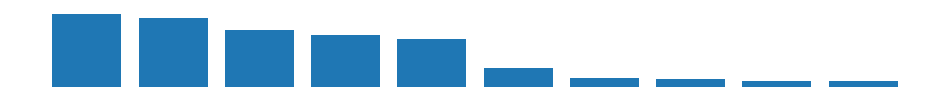

In [57]:
impresso.text_reuse.clusters.facet("newspaper")

## daterange

,count
val,
1875-01-01T00:00:00Z,1
1885-01-01T00:00:00Z,6
1886-01-01T00:00:00Z,4

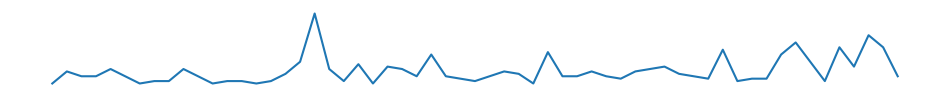

In [59]:
impresso.text_reuse.passages.facet(
    "daterange",
    text="banana"
)

## yearmonth

,count
val,
1961-03,25
2011-08,14
1960-09,10

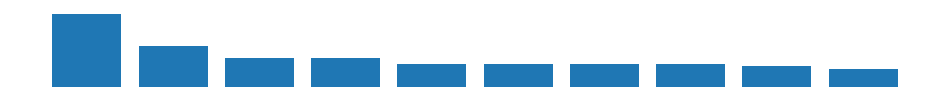

In [61]:
impresso.text_reuse.passages.facet(
    "yearmonth",
    text="banana"
)

## year

,count,uid,item.refs.c,item.refs.a
val,,,,
1961,30,1961,282880,279422
2013,21,2013,105308,101290
2008,18,2008,140211,137231

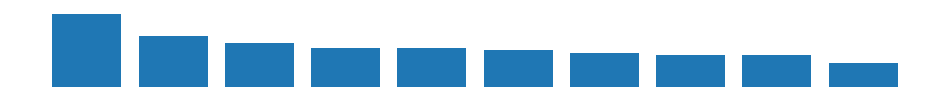

In [63]:
impresso.text_reuse.passages.facet(
    "year",
    text="banana"
)

## connectedClusters

,count
val,
tr-nobp-all-v01-c163801,10
tr-nobp-all-v01-c8590322057,10
tr-nobp-all-v01-c42949724284,9

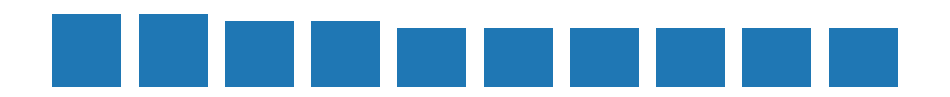

In [65]:
impresso.text_reuse.passages.facet(
    "connectedClusters",
    text="banana"
)

## textReuseClusterSize

,count
val,
2,368
252,0
502,0

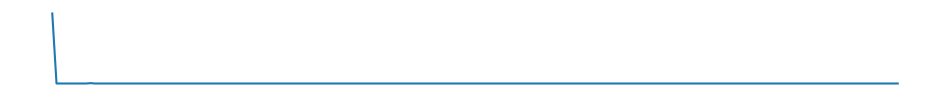

In [67]:
impresso.text_reuse.passages.facet(
    "textReuseClusterSize",
    text="banana"
)

## textReuseClusterLexicalOverlap

,count
val,
0,2
1,1
2,0

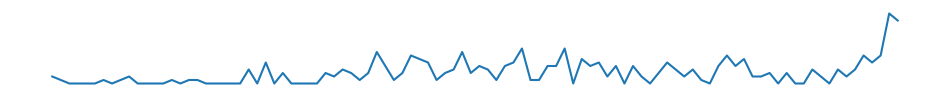

In [69]:
impresso.text_reuse.passages.facet(
    "textReuseClusterLexicalOverlap",
    text="banana"
)

## textReuseClusterDayDelta

,count
val,
0,331
100,11
200,3

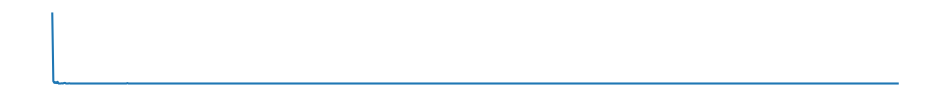

In [71]:
impresso.text_reuse.passages.facet(
    "textReuseClusterDayDelta",
    text="banana"
)

## textReuseCluster

,count
val,
tr-nobp-all-v01-c8590322057,5
tr-nobp-all-v01-c154619006960,4
tr-nobp-all-v01-c384632,4

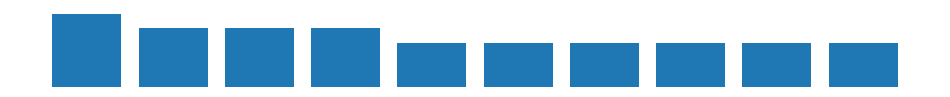

In [73]:
impresso.text_reuse.passages.facet(
    "textReuseCluster",
    text="banana"
)

## collection

In [75]:
impresso.text_reuse.passages.facet(
    "collection",
    text="banana"
)

""


## topic

,count,uid,item.uid,item.language,item.community,item.pagerank,item.degree,item.x,item.y,item.relatedTopics,item.countItems,item.excerpt,item.words,item.model
val,,,,,,,,,,,,,,
tm-fr-all-v2.0_tp74_fr,64,tm-fr-all-v2.0_tp74_fr,,,,0,0,0,0,[],-1,[],[],
tm-fr-all-v2.0_tp43_fr,62,tm-fr-all-v2.0_tp43_fr,,,,0,0,0,0,[],-1,[],[],
tm-fr-all-v2.0_tp12_fr,56,tm-fr-all-v2.0_tp12_fr,,,,0,0,0,0,[],-1,[],[],

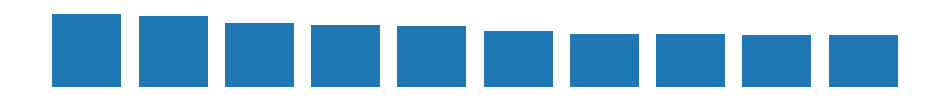

In [77]:
impresso.text_reuse.passages.facet("topic", text="banana")

## person

,count,uid,item.uid
val,,,
aida-0001-50-Marco_Schneuwly,21,aida-0001-50-Marco_Schneuwly,aida-0001-50-Marco_Schneuwly
aida-0001-50-Christian_Schneuwly,20,aida-0001-50-Christian_Schneuwly,aida-0001-50-Christian_Schneuwly
aida-0001-50-Nassim_Ben_Khalifa,19,aida-0001-50-Nassim_Ben_Khalifa,aida-0001-50-Nassim_Ben_Khalifa

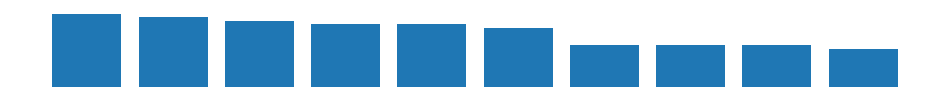

In [79]:
impresso.text_reuse.passages.facet("person", text="banana")

## location

,count,uid,item.uid
val,,,
aida-0001-54-Suisse$2c$_Moselle,83,aida-0001-54-Suisse$2c$_Moselle,aida-0001-54-Suisse$2c$_Moselle
aida-0001-54-France,69,aida-0001-54-France,aida-0001-54-France
aida-0001-54-Democratic_Republic_of_the_Congo,68,aida-0001-54-Democratic_Republic_of_the_Congo,aida-0001-54-Democratic_Republic_of_the_Congo

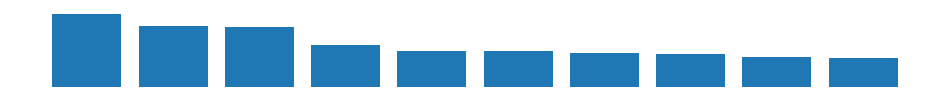

In [81]:
impresso.text_reuse.passages.facet("location", text="banana")

## nag

In [83]:
impresso.text_reuse.passages.facet("nag", text="banana")

""


## language

,count,uid
val,,
fr,348,fr
de,17,de

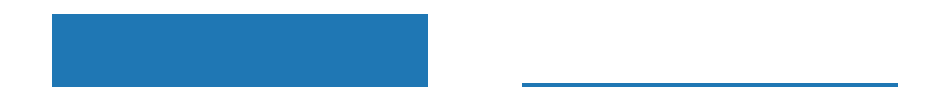

In [85]:
impresso.text_reuse.passages.facet("language", text="banana")

## country

,count
val,
CH,359
LU,6

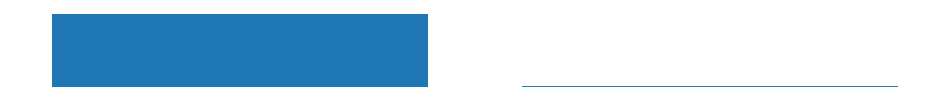

In [87]:
impresso.text_reuse.passages.facet("country", text="banana")